In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats.stats as st
%matplotlib inline
import random

When we have a sample and we know from what distribution it was drawn, we can know what the standard error of our estimate is.

Estimation: 0.448484459912 0.319027689633 0.199382908287 0.141600176486 

Theoretical: 0.4472135955 0.316227766017 0.2 0.141421356237


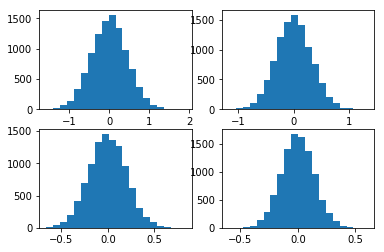

In [106]:
#compute the means of 10000 samples of a normal distribution
x=np.random.normal(0,1,size=[5,10000])
y=np.random.normal(0,1,size=[10,10000])
z=np.random.normal(0,1,size=[25,10000])
t=np.random.normal(0,1,size=[50,10000])

print('Estimation:',
      np.std(np.mean(x,axis=0)),
      np.std(np.mean(y,axis=0)),
      np.std(np.mean(z,axis=0)),
      np.std(np.mean(t,axis=0)),'\n')

print('Theoretical:',
      1/np.sqrt(5),
      1/np.sqrt(10),
      1/np.sqrt(25),
      1/np.sqrt(50))

plt.subplot(221)
plt.hist(np.mean(x,axis=0),20);
plt.subplot(222)
plt.hist(np.mean(y,axis=0),20);
plt.subplot(223)
plt.hist(np.mean(z,axis=0),20);
plt.subplot(224)
plt.hist(np.mean(t,axis=0),20);

9.97390502803


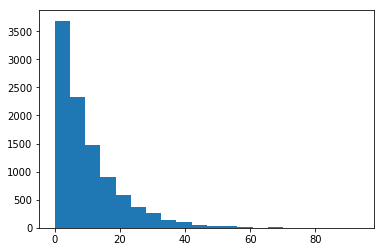

In [107]:
#the gamma distribution
plt.hist(np.random.gamma(1,10,size=10000),20);
s=np.std(np.random.gamma(1,10,size=10000))
print(s)

Estimation: 4.47719206203 3.12712409562 2.01568215339 1.41984267289 

Theoretical: 4.46046592876 3.15402570548 1.99478100561 1.41052317605


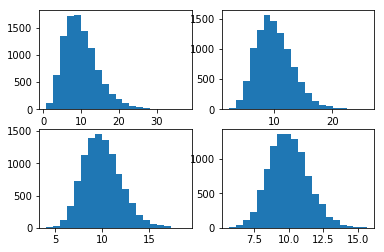

In [108]:
#compute the means of 1000 samples of a gamma distribution of size 10
x=np.random.gamma(1,10,size=[5,10000])
y=np.random.gamma(1,10,size=[10,10000])
z=np.random.gamma(1,10,size=[25,10000])
t=np.random.gamma(1,10,size=[50,10000])

print('Estimation:',
      np.std(np.mean(x,axis=0)),
      np.std(np.mean(y,axis=0)),
      np.std(np.mean(z,axis=0)),
      np.std(np.mean(t,axis=0)),'\n')

print('Theoretical:',
      s/np.sqrt(5),
      s/np.sqrt(10),
      s/np.sqrt(25),
      s/np.sqrt(50))

plt.subplot(221)
plt.hist(np.mean(x,axis=0),20);
plt.subplot(222)
plt.hist(np.mean(y,axis=0),20);
plt.subplot(223)
plt.hist(np.mean(z,axis=0),20);
plt.subplot(224)
plt.hist(np.mean(t,axis=0),20);

This is the central limit theorem!!!

In conclusion, if a sample satisfied at least one of the following:

>The distribution of the random variable, X, is Normal. The sample size is large; rule of thumb is n > 30

then the sampling distribution of mean(X) is approximately Normal with

    Mean: μ
    Standard error: s/√n


What happens when we do not know the underlying distribution and cannot resample from the distribution? How could we estimate certain sample statistics?

In [4]:
# this is a secret!
n = 10
x = pd.Series(np.random.gamma(2,8,size=n))*100
x

0    1046.490416
1    1453.555458
2    2511.469648
3    1735.720276
4     709.651811
5    3498.284266
6     780.412187
7    1639.779662
8    2681.655830
9    1086.323184
dtype: float64

In [5]:
print(np.mean(x))

1714.33427387


But what about the standard deviation? the confidence interval?

In [6]:
np.std(x)/np.sqrt(len(x))

274.7661801476608

In [9]:
x

0    1046.490416
1    1453.555458
2    2511.469648
3    1735.720276
4     709.651811
5    3498.284266
6     780.412187
7    1639.779662
8    2681.655830
9    1086.323184
dtype: float64

In [7]:
resample=np.random.randint(n,size=(n,10000))
x_resamples = x.values[resample]
x_boot = np.mean(x_resamples,axis=0)

In [11]:
x_resamples[:,0]

array([ 1086.32318423,  3498.28426616,  1735.72027588,  2681.65582977,
         709.65181133,  1639.77966183,  1046.49041626,  1453.55545819,
        1735.72027588,  2511.46964786])

In [12]:
np.mean(x)

1714.334273872623

In [13]:
np.std(x)/np.sqrt(10)

274.7661801476608

mean(x_boot) = 1720.92094966
std(x_boot) = 275.841258253


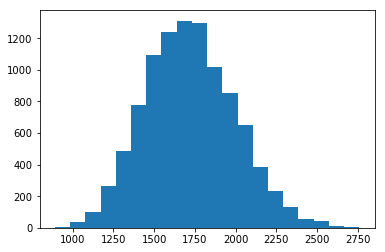

In [8]:
plt.hist(x_boot,20);
print('mean(x_boot) = ' + str(np.mean(x_boot)))
print('std(x_boot) = ' + str(np.std(x_boot)))

But we can also do it for the median!

In [114]:
print(np.median(x))

13.7465112249


Note that if we know the distribution, we can just sample it many times.

mean(x_samples) = 13.4252719145
std(x_samples) = 1.29512881819


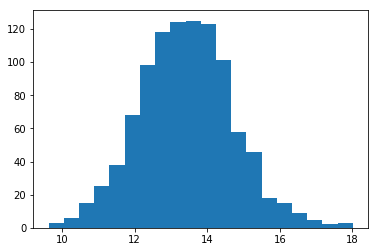

In [14]:
n = 100
x = np.random.gamma(2,8,size=(n,1000))
x_sample = np.median(x,axis=0)
plt.hist(x_sample,20);
print('mean(x_samples) = ' + str(np.mean(x_sample)))
print('std(x_samples) = ' + str(np.std(x_sample)))

But here we bootstrap it because we assume we don't know the distribution.

In [16]:
n

100

In [23]:
x = np.random.gamma(2,8,size=n)
x

array([  7.48132551,   5.20592033,  10.50842925,   7.47430253,
        15.3665067 ,   8.76505995,  16.99107317,   8.1815506 ,
         5.38430878,  15.2721574 ,  36.89469336,  32.3861052 ,
         6.49348252,  10.55089359,  10.41797316,  10.18287325,
         9.82514005,  34.53940363,   4.05596483,  14.73187637,
        27.1434593 ,  16.99571706,  11.94751004,   2.69515113,
        10.62011296,  20.97813617,   6.11637045,  15.30118101,
        31.32934915,   6.1691941 ,  20.6083716 ,  16.60764429,
        37.90839793,   3.24792106,  12.61654055,   9.77306851,
         4.05100588,  16.3313559 ,   2.25289704,  12.78149703,
        29.95303286,   6.07738564,   8.16035149,  19.20850741,
        10.66856915,   4.19425361,  23.47155345,  37.02537053,
         8.2010593 ,   2.73504101,  23.87044005,   7.24276661,
         5.95393037,   5.87711253,   5.74426416,  23.37183636,
        15.64256182,   8.76640933,   7.73506066,  33.6289569 ,
         2.92250936,  18.34069183,  22.26268649,  12.84

In [24]:
np.median(x)

12.8147856846465

In [25]:
resample=np.random.randint(n,size=(n,10000))
x_resamples = x[resample]
x_boot = np.median(x_resamples,axis=0)

mean(x_boot) = 12.9417291687
std(x_boot) = 1.64036014508


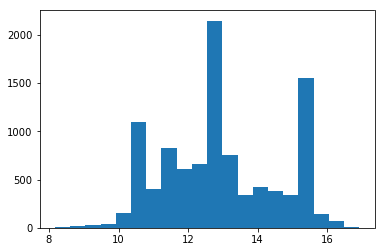

In [27]:
plt.hist(x_boot,20);
print('mean(x_boot) = ' + str(np.mean(x_boot)))
print('std(x_boot) = ' + str(np.std(x_boot)))

We can also bootstrap correlation for example

corr = 0.798383010343


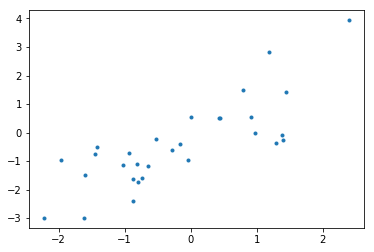

In [29]:
x = pd.Series(np.random.normal(size=30))
y = x + pd.Series(np.random.normal(size=30))
plt.plot(x,y,'.');
corr_sample = np.corrcoef(x,y)[0,1]
print('corr = ' + str(corr_sample))

mean(corr_boot) = 0.79620825006
std(corr_boot) = 0.0625142258112


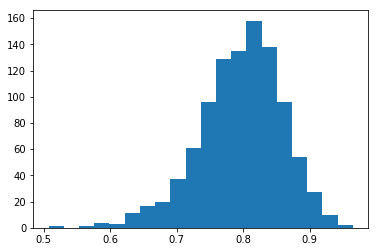

In [31]:
corr_boot = np.zeros(1000)

for i in range(1000):
    resample = np.random.randint(30,size=30)
    corr_boot[i] = np.corrcoef(x[resample],y[resample])[0,1]
    
plt.hist(corr_boot, 20);
print('mean(corr_boot) = ' + str(np.mean(corr_boot)))
print('std(corr_boot) = ' + str(np.std(corr_boot)))